In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset_1 = pd.read_csv('dataset/apartments_for_rent_classified_100K.csv', encoding='latin1' , delimiter=';')

C:\Users\lucao\AppData\Local\Temp\ipykernel_26424\2022929785.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset_1 = pd.read_csv('apartments_for_rent_classified_100K.csv', encoding='latin1' , delimiter=';')


In [4]:
print(dataset_1.columns)

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')


In [5]:
print(dataset_1.dtypes)

id                 int64
category          object
title             object
body              object
amenities         object
bathrooms        float64
bedrooms         float64
currency          object
fee               object
has_photo         object
pets_allowed      object
price            float64
price_display     object
price_type        object
square_feet        int64
address           object
cityname          object
state             object
latitude         float64
longitude        float64
source            object
time               int64
dtype: object


C:\Users\lucao\AppData\Local\Temp\ipykernel_26424\4102765365.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', data=dataset_1, palette='pastel')


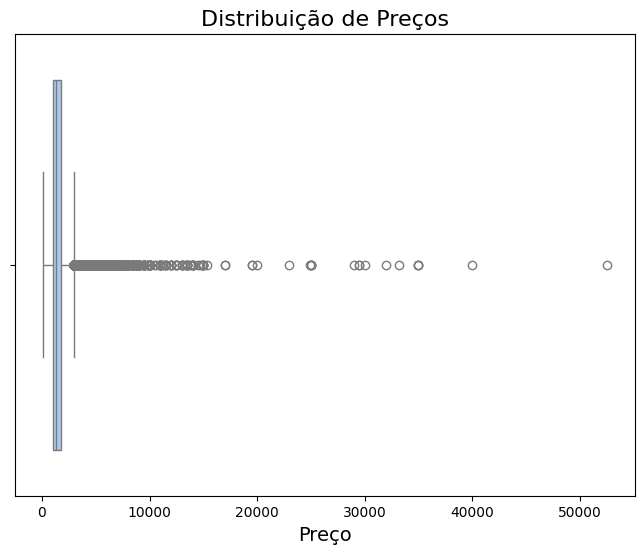

In [6]:
import seaborn as sns


plt.figure(figsize=(8, 6))  # Definir o tamanho da figura
sns.boxplot(x='price', data=dataset_1, palette='pastel')

plt.title('Distribuição de Preços', fontsize=16)
plt.xlabel('Preço', fontsize=14)

plt.show()

C:\Users\lucao\AppData\Local\Temp\ipykernel_26424\3336452391.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price', data=df_sem_outliers, palette='pastel')


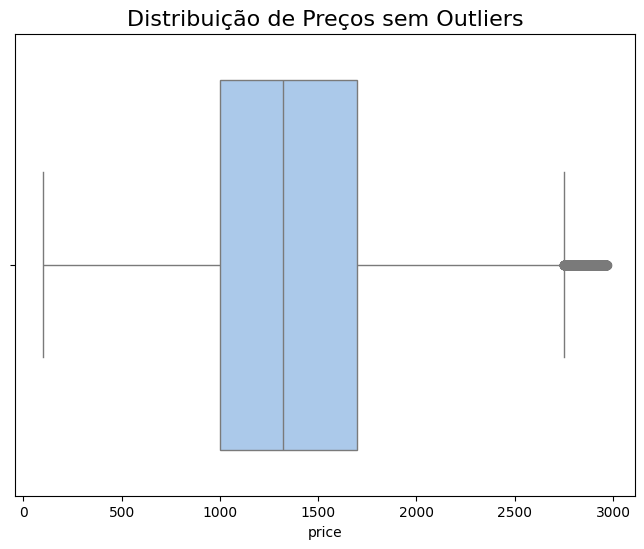

In [7]:

df = dataset_1
# Calcular Q1, Q3 e IQR
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para remover outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os dados para remover outliers
df_sem_outliers = df[(df['price'] >= limite_inferior) & (df['price'] <= limite_superior)]

# Criar o boxplot sem os outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x='price', data=df_sem_outliers, palette='pastel')

# Adicionar título e rótulos
plt.title('Distribuição de Preços sem Outliers', fontsize=16)

# Exibir o gráfico
plt.show()

In [8]:
# Definindo uma função de adaptação
def adaptar(valor):
    return valor / 10.76 # Exemplo de fórmula: 2 * valor + 1

# Aplicando a função a todos os valores da coluna
df['square_m'] = df['square_feet'].apply(adaptar)

contagem = df.groupby('cityname').size()

# Encontrar o grupo com o maior número de valores
grupo_mais_valores = contagem.idxmax()
quantidade_mais_valores = contagem.max()

print(f"O grupo com mais valores é '{grupo_mais_valores}' com {quantidade_mais_valores} ocorrências.")

# Encontrar os três grupos com mais valores
top_grupos = contagem.nlargest(3)

# Exibir o resultado
print("Os grupos com mais valores são:")
print(top_grupos)

O grupo com mais valores é 'Dallas' com 2858 ocorrências.
Os grupos com mais valores são:
cityname
Dallas         2858
Denver         2755
Los Angeles    2433
dtype: int64


In [10]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso


def RegressaoLinear(x,y,s,b):   
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Ridge Regression
    ridge_model = Ridge(alpha=1.0)
    ridge_model.fit(x_train, y_train)
    y_pred_ridge = ridge_model.predict(x_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    print(f'MSE com Ridge: {mse_ridge}')

    # Lasso Regression
    lasso_model = Lasso(alpha=0.1)
    lasso_model.fit(x_train, y_train)
    y_pred_lasso = lasso_model.predict(x_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    print(f'MSE com Lasso: {mse_lasso}')

    plt.figure(figsize=(12, 5))

    # Plotar os dados reais e as previsões
    plt.scatter(x_test, y_test, color='red', label='Dados Reais', s = 15)
    plt.plot(x_test, y_pred_lasso, color='blue', linewidth=3, label='Previsões')
    plt.xlabel(s)
    plt.ylabel(b)
    plt.legend()
    plt.show()

        # Plotar os dados reais e as previsões
    plt.scatter(x_test, y_test, color='red', label='Dados Reais', s = 15)
    plt.plot(x_test, y_pred_ridge, color='blue', linewidth=3, label='Previsões')
    plt.xlabel(s)
    plt.ylabel(b)
    plt.legend()
    plt.show()



# Função para calcular a hipótese
def hypothesis(X, theta):
    return np.dot(X, theta)

# Função de Custo
def cost_function(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((hypothesis(X, theta) - y) ** 2)

# Gradiente Descendente
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for it in range(iterations):
        gradient = (1/m) * np.dot(X.T, (hypothesis(X, theta) - y))
        theta = theta - alpha * gradient
        cost_history[it] = cost_function(X, y, theta)

    return theta, cost_history

# Configurações
alpha = 0.01  # Taxa de aprendizado
iterations = 1000  # Número de iterações
theta = np.random.randn(2)  # Inicializar os parâmetros
        

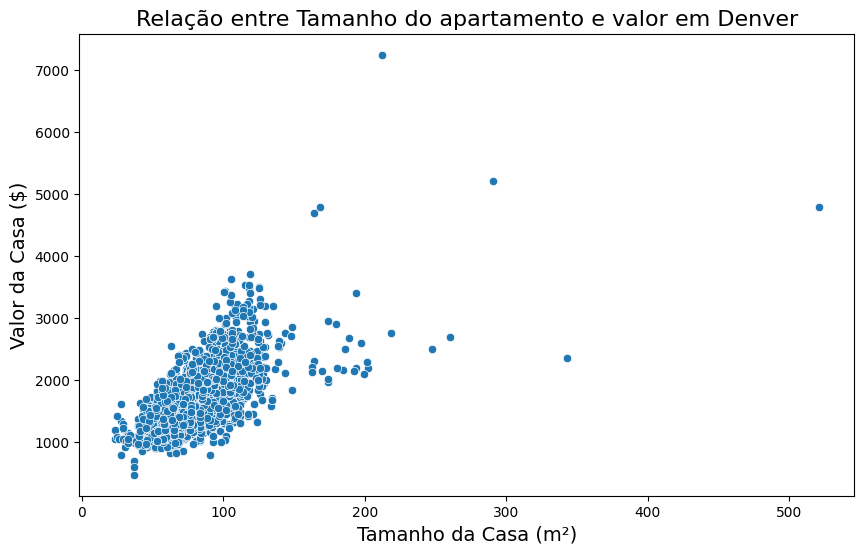

In [31]:
# Criar o scatter plot

df_a = df[df['cityname'] == 'Denver']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_m', y='price', data=df_a)

plt.title('Relação entre Tamanho do apartamento e valor em Denver', fontsize=16)
plt.xlabel('Tamanho da Casa (m²)', fontsize=14)
plt.ylabel('Valor da Casa ($)', fontsize=14)

# Exibir o gráfico
plt.show()

MSE com Ridge: 124581.43719468608
MSE com Lasso: 124580.68585280876


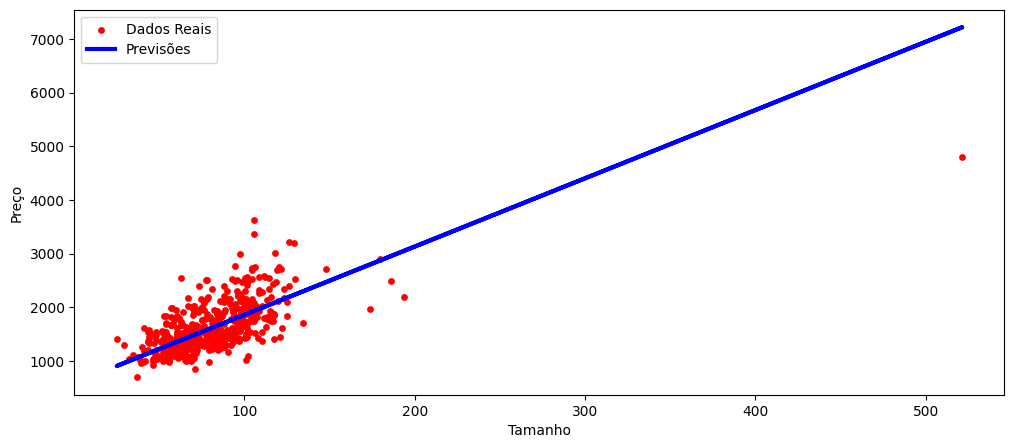

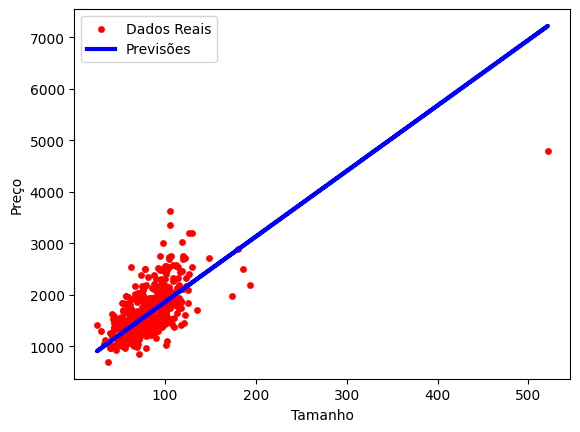

In [30]:
RegressaoLinear(df_a[['square_m']], df_a['price'], 'Tamanho', 'Preço')

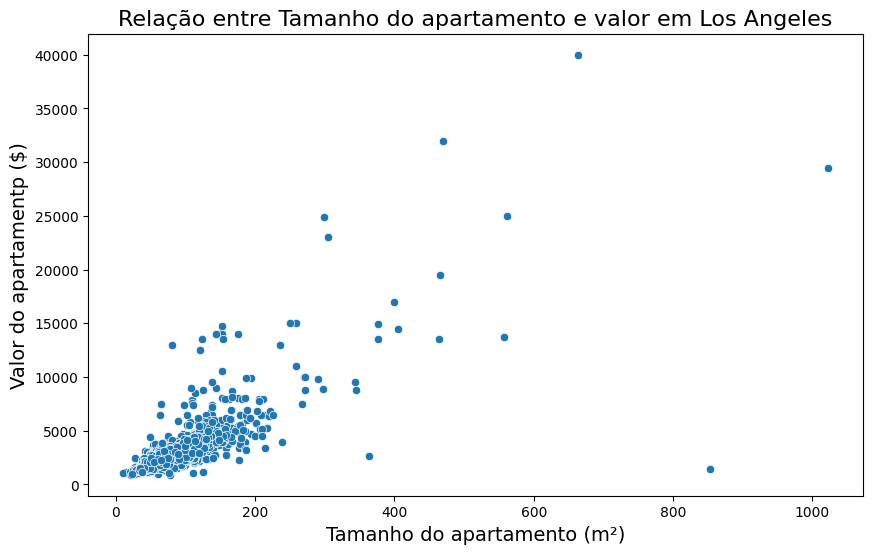

In [29]:
df_h = df[df['cityname'] == 'Los Angeles']

plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_m', y='price', data=df_h)

plt.title('Relação entre Tamanho do apartamento e valor em Los Angeles', fontsize=16)
plt.xlabel('Tamanho do apartamento (m²)', fontsize=14)
plt.ylabel('Valor do apartamentp ($)', fontsize=14)

# Exibir o gráfico
plt.show()

MSE com Ridge: 3094517.578182122
MSE com Lasso: 3094512.339949921


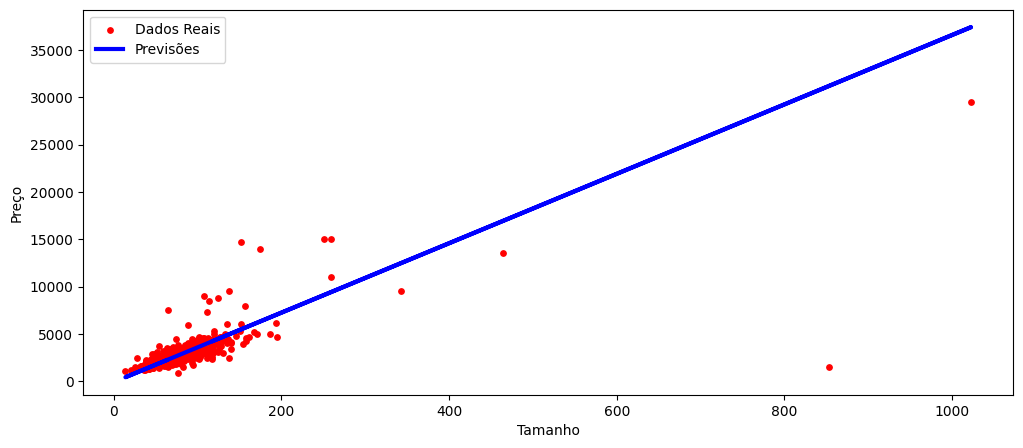

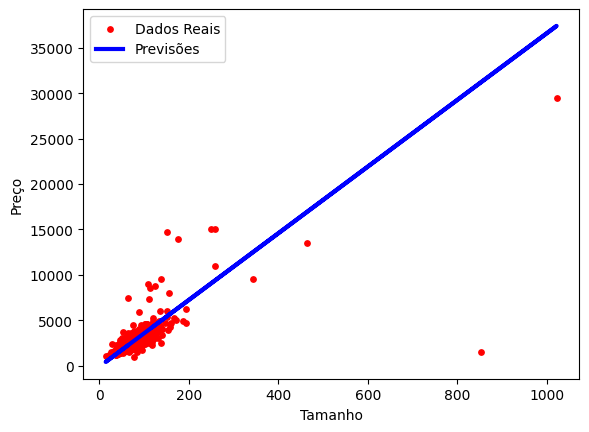

In [28]:
RegressaoLinear(df_h[['square_m']], df_h['price'], 'Tamanho', 'Preço')

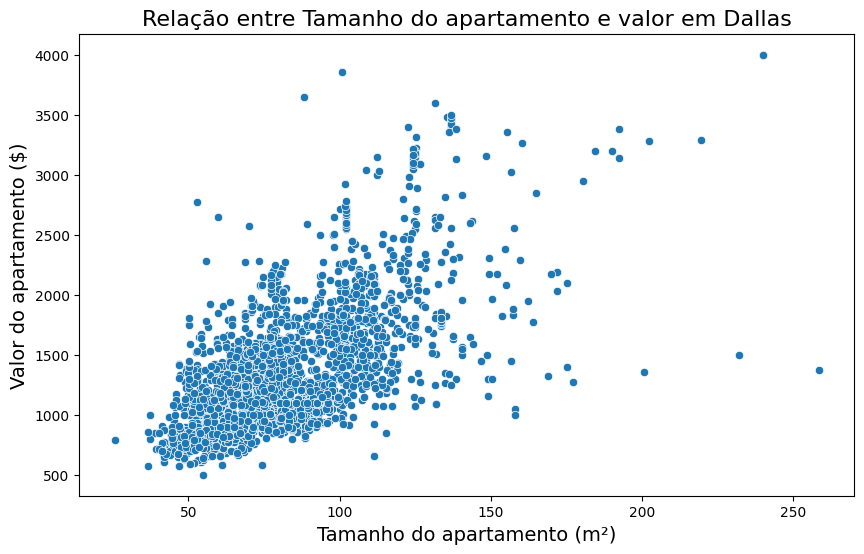

In [24]:
# Criar o scatter plot

df_n = df[df['cityname'] == 'Dallas']

df_n.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='square_m', y='price', data=df_n)

plt.title('Relação entre Tamanho do apartamento e valor em Dallas', fontsize=16)
plt.xlabel('Tamanho do apartamento (m²)', fontsize=14)
plt.ylabel('Valor do apartamento ($)', fontsize=14)

# Exibir o gráfico
plt.show()

MSE com Ridge: 154856.5049429019
MSE com Lasso: 154856.55042698182


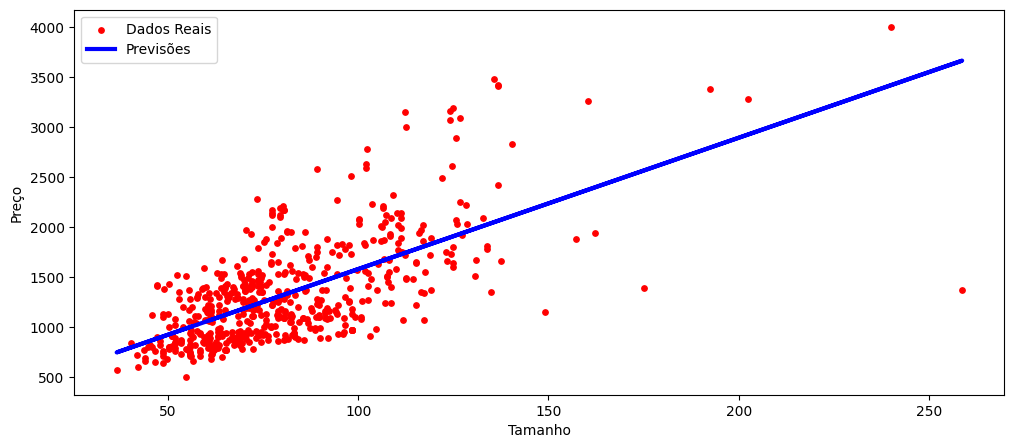

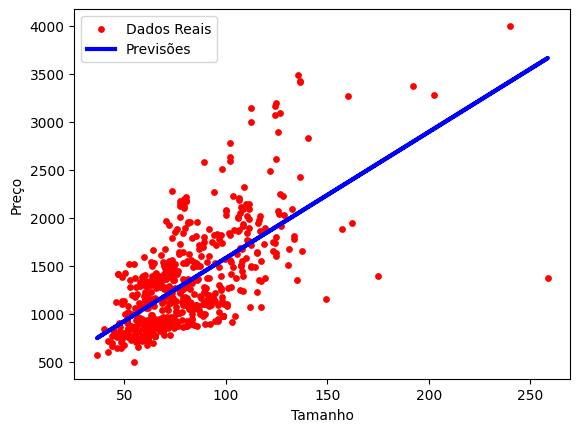

In [22]:
RegressaoLinear(df_n[['square_m']], df_n['price'], 'Tamanho', 'Preço')

In [33]:
df_na = df_n.groupby(['latitude', 'longitude'], as_index=False).agg(
    price=('price', 'sum'),
    quantidade=('price', 'size')  # Conta o número de elementos agrupados
)

df_na['media'] = df_na['price'] / df_na['quantidade']

df_na['media'].mean()

1243.9753903507499

In [34]:
import folium


mapa = folium.Map( location = [df_na['latitude'][0], df_na['longitude'][0]])

for i in range(len(df_na)):
    coordenada = [df_na['latitude'][i], df_na['longitude'][i] ]
    casa = f" $: {df_na['media'][i]} "
    if df_na['media'][i] > 1282:
        folium.Marker(coordenada, popup = casa).add_to(mapa)
    else:
        folium.Marker(coordenada, popup = casa, icon = folium.Icon(color = "red")).add_to(mapa)

mapa

In [36]:
df_aa = df_a.groupby(['latitude', 'longitude'], as_index=False).agg(
    price=('price', 'sum'),
    quantidade=('price', 'size')  # Conta o número de elementos agrupados
)

df_aa['media'] = df_aa['price'] / df_aa['quantidade']

valor_medio = df_aa['media'].mean()

mapa_a = folium.Map( location = [df_aa['latitude'][2], df_aa['longitude'][2]])

for i in range(len(df_aa)):
    coordenada_a = [df_aa['latitude'][i], df_aa['longitude'][i] ]
    casa_a = f" $: {df_aa['media'][i]} "
    if df_aa['media'][i] > valor_medio:
        folium.Marker(coordenada_a, popup = casa_a).add_to(mapa_a)
    else:
        folium.Marker(coordenada_a, popup = casa_a, icon = folium.Icon(color = "red")).add_to(mapa_a)

mapa_a

In [37]:
df_ha = df_h.groupby(['latitude', 'longitude'], as_index=False).agg(
    price=('price', 'sum'),
    quantidade=('price', 'size')  # Conta o número de elementos agrupados
)

df_ha['media'] = df_ha['price'] / df_ha['quantidade']

valor_medio = df_ha['media'].mean()

mapa_h = folium.Map( location = [df_ha['latitude'][0], df_ha['longitude'][0]])

for i in range(len(df_ha)):
    coordenada_h = [df_ha['latitude'][i], df_ha['longitude'][i] ]
    casa_h = f" $: {df_ha['media'][i]} "
    if df_ha['media'][i] > valor_medio:
        folium.Marker(coordenada_h, popup = casa_h).add_to(mapa_h)
    else:
        folium.Marker(coordenada_h, popup = casa_h, icon = folium.Icon(color = "red")).add_to(mapa_h)

mapa_h

In [43]:

df['amenitiess'] = df['amenities'].str.split(',')
df_explodido = df.explode('amenitiess')


# Agora, você pode agrupar e analisar o impacto dos objetos no preço
impacto_objetos = df_explodido.groupby('amenities')['price'].agg(['sum', 'mean', 'count']).reset_index()

# Renomear as colunas para maior clareza
impacto_objetos.columns = ['amenities', 'soma_preco', 'media_preco', 'quantidade']

In [44]:
media_impacto = impacto_objetos['media_preco'].mean()

impacto_objetos['ranking'] = impacto_objetos['media_preco'].rank(ascending=False)

impacto_objetos.sort_values(by='ranking', inplace=True)

print(impacto_objetos)

                                              amenities  soma_preco  \
1773  AC,Cable or Satellite,Internet Access,Patio/De...    262500.0   
6210  Clubhouse,Elevator,Fireplace,Gated,Gym,Parking...    320000.0   
8167                   Elevator,Hot Tub,Patio/Deck,Pool    140000.0   
8039           Elevator,Fireplace,Parking,Patio/Deck,TV    160000.0   
7232  Dishwasher,Elevator,Fireplace,Hot Tub,View,Was...    180000.0   
...                                                 ...         ...   
111   AC,Basketball,Cable or Satellite,Clubhouse,Dis...      4202.0   
702   AC,Cable or Satellite,Clubhouse,Dishwasher,Gat...      3707.0   
2109  AC,Clubhouse,Dishwasher,Gym,Parking,Refrigerat...      4592.0   
7063  Clubhouse,Internet Access,Playground,Washer Dryer      3696.0   
5885    Cable or Satellite,Pool,Refrigerator,Storage,TV      1375.0   

      media_preco  quantidade  ranking  
1773      52500.0           5      1.0  
6210      40000.0           8      2.0  
8167      35000.0       

In [45]:
df['price'] = df['price'].fillna(df['price'].mean()) 

df['price_category'] = pd.qcut(df['price'], q=3, labels=['Baixo', 'Médio', 'Alto'])

print(df[['price', 'price_category']].head(20))

     price price_category
0   2195.0           Alto
1   1250.0          Médio
2   1395.0          Médio
3   1600.0          Médio
4    975.0          Baixo
5   1250.0          Médio
6   1600.0          Médio
7   1300.0          Médio
8    795.0          Baixo
9   2150.0           Alto
10  1795.0           Alto
11  3195.0           Alto
12  2395.0           Alto
13  7800.0           Alto
14   720.0          Baixo
15  2000.0           Alto
16   729.0          Baixo
17  1045.0          Baixo
18  1800.0           Alto
19  1250.0          Médio


In [46]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())

df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean()) 

df['pets_allowed'] = df['pets_allowed'].fillna(df['pets_allowed'].mode()[0])

df['address'] = df['address'].fillna(df['address'].mode()[0])

df['cityname'] = df['cityname'].fillna(df['cityname'].mode()[0])

df['state'] = df['state'].fillna(df['state'].mode()[0])

df['latitude'] = df['latitude'].fillna(df['latitude'].mean()) 

df['longitude'] = df['longitude'].fillna(df['longitude'].mean()) 

df['price'] = df['price'].fillna(df['price'].mean()) 

df = df.drop('amenitiess', axis=1)

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features selecionadas
features = ['latitude', 'longitude', 'bedrooms', 'bathrooms', 'square_feet', 'has_photo']  # Customize conforme necessário
X = df[features]

# Label (target)
y = df['price_category']

# Dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizando features numéricas
scaler = StandardScaler()
X_train[['latitude', 'longitude', 'square_feet']] = scaler.fit_transform(X_train[['latitude', 'longitude', 'square_feet']])
X_test[['latitude', 'longitude', 'square_feet']] = scaler.transform(X_test[['latitude', 'longitude', 'square_feet']])

# Convertendo variáveis categóricas (se houver)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Exibir colunas que têm valores NaN
print(df.columns[df.isna().any()])


Index(['amenities', 'price_display'], dtype='object')


In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inicializando o modelo
model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 1, min_samples_split = 5, n_estimators = 300, random_state=42)
# Treinando o modelo
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8197396854113272
              precision    recall  f1-score   support

        Alto       0.88      0.85      0.87      6597
       Baixo       0.84      0.86      0.85      6720
       Médio       0.74      0.75      0.75      6582

    accuracy                           0.82     19899
   macro avg       0.82      0.82      0.82     19899
weighted avg       0.82      0.82      0.82     19899



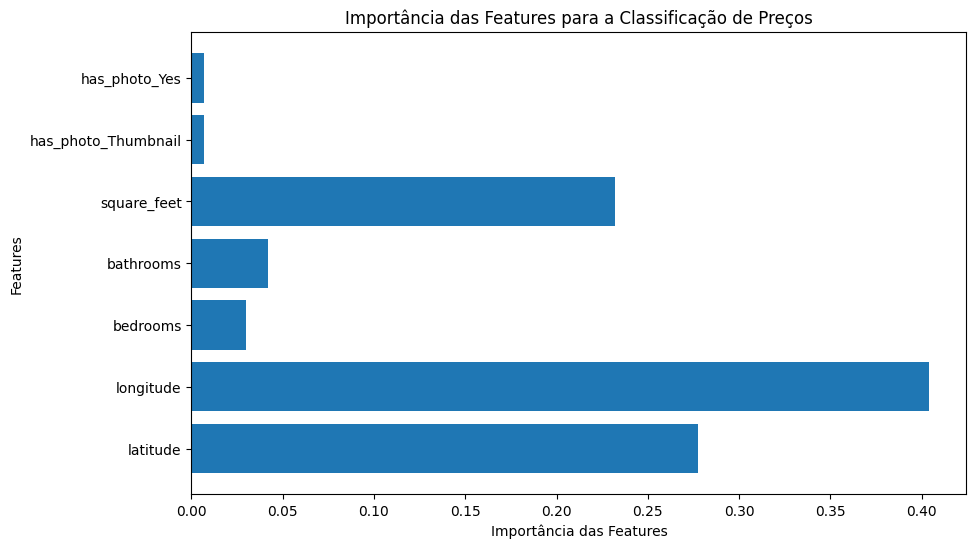

In [49]:
import matplotlib.pyplot as plt

# Importância das features
importances = model.feature_importances_
feature_names = X_train.columns

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel('Importância das Features')
plt.ylabel('Features')
plt.title('Importância das Features para a Classificação de Preços')
plt.show()
